In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
out_path = '../output/search_gdi_features_nn_5x256x1_tanh_linear/'

In [3]:
all_files = [f for f in listdir(out_path) if isfile(join(out_path, f))]
li = []
for f in all_files:
    df = pd.read_csv(join(out_path, f), index_col=None, header=0)
    li.append(df)

results_nn = pd.concat(li, axis=0, ignore_index=True)

In [17]:
results_nn.sort_values(by=['val_score']).head()

,f1,f2,f3,f4,f5,val_score
1135,abs_max_roll_mean_100,ave_roll_std_10,q95_roll_std_100,q05_roll_std_1000,q05_roll_std_10,2.338697
378,q99_roll_std_100,MA_400MA_BB_high_mean,q99_roll_mean_10,Hilbert_mean,q05_roll_std_10,2.339151
408,q05_roll_std_1000,q01,av_change_abs_roll_mean_10,ave_roll_std_10,count_big,2.339403
524,mean_change_rate_first_10000,av_change_abs_roll_std_1000,std_last_50000,q05_roll_std_10,q999,2.346420
136,abs_mean,Hilbert_mean,mean_diff,q05_roll_std_1000,q01_roll_std_10,2.346871


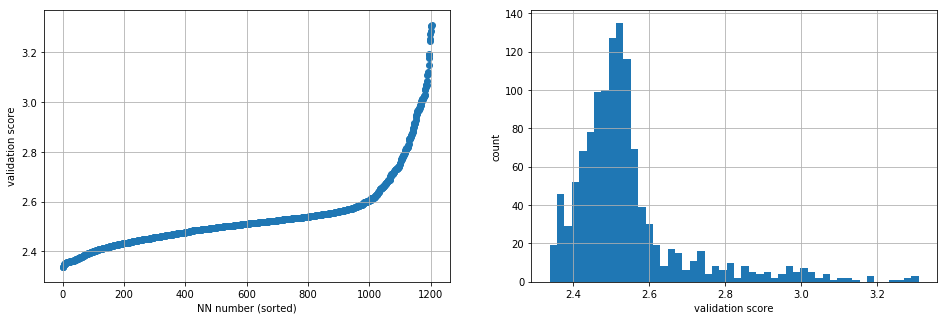

In [18]:
plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(results_nn.shape[0]), results_nn.sort_values(by=['val_score'])['val_score'])
plt.grid()
plt.ylabel('validation score')
plt.xlabel('NN number (sorted)')

plt.subplot(1, 2, 2)
plt.hist(results_nn['val_score'].tolist(), bins='auto')  # arguments are passed to np.histogram
plt.grid()
plt.ylabel('count')
plt.xlabel('validation score')

plt.show()